## K-Nearest Neighbour (KNN)

- bisa digunakan untuk klasifikasi dan regresi, namun lebih sering digunakan untuk klasifikasi
- digunakan pada data yang memiliki kurang dari 20 feature
- butuh data training yang banyak
- mengelompokkan berdasarkan jarak terdekat
    ### K = jumlah tetangga terdekat
    
    
- tips:
    - menggunakan jumlah k yang ganjil
    - evaluasi menggunakan validasi
- jarak dihitung menggunakan perhitungan eulidean distance
- lakukan normalisasi (standarisasi) data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('Classified Data', index_col = 0)

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
data.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = data.drop('TARGET CLASS', axis = 1)
y = data['TARGET CLASS']

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 101)

In [12]:
scaler.fit(xtrain)

StandardScaler()

In [13]:
xtrain = pd.DataFrame(scaler.transform(xtrain), columns = xtrain.columns)

In [14]:
xtrain.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.910097,-0.402995,-0.091367,-0.368367,-0.112513,-1.407076,0.930878,-0.677637,-1.455978,1.344703
1,-0.329683,0.445697,-0.315784,-0.299316,-1.081370,-0.818308,0.302637,-2.076786,-1.111414,0.812907
2,-1.678304,0.856228,1.163884,-1.016196,0.330985,-0.047875,0.995094,-0.146801,0.824747,-0.645881
3,-0.618279,-0.136367,0.108577,1.217433,-2.528158,-0.574464,-0.252058,0.302786,0.558425,1.386318
4,0.021723,1.021470,1.926951,2.301283,-0.597939,0.640418,2.402393,1.182115,0.064625,-0.185064


### Menggunakan K = 1

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [17]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred1 = knn.predict(scaler.transform(xtest))

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
confusion_matrix(pred1, ytest)

array([[151,  14],
       [  8, 127]])

In [21]:
print(classification_report(pred1, ytest))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       165
           1       0.90      0.94      0.92       135

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



### Mencari K dengan Error Rate Terkecil

In [22]:
error_rate = []

for i in range(1,150):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(scaler.transform(xtest))
    error_rate.append(np.mean(pred_i != ytest))

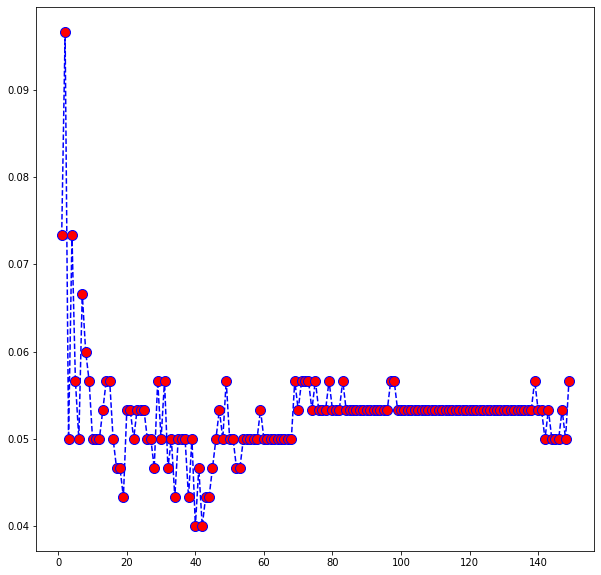

In [35]:
plt.figure(figsize=(10,10))
plt.plot(range(1,150), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.xlabel = 'Number of K'
plt.ylabel = 'Error Rate'

### Menggunakan K = 40

In [36]:
knn = KNeighborsClassifier(n_neighbors = 40)

In [37]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=40)

In [38]:
pred2 = knn.predict(scaler.transform(xtest))

In [39]:
confusion_matrix(pred2, ytest)

array([[154,   7],
       [  5, 134]])

In [40]:
print(classification_report(pred2, ytest))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       161
           1       0.95      0.96      0.96       139

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## Latihan 1

In [136]:
from sklearn.datasets import load_breast_cancer

In [137]:
cancer = load_breast_cancer()

In [138]:
x = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
y = cancer['target']

In [139]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 101)

In [140]:
scaler = StandardScaler()

In [141]:
scaler.fit(xtrain)

StandardScaler()

In [142]:
xtrain = pd.DataFrame(scaler.transform(xtrain), columns = xtrain.columns)

In [143]:
error_rate = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(scaler.transform(xtest))
    error_rate.append(np.mean(pred_i != ytest))

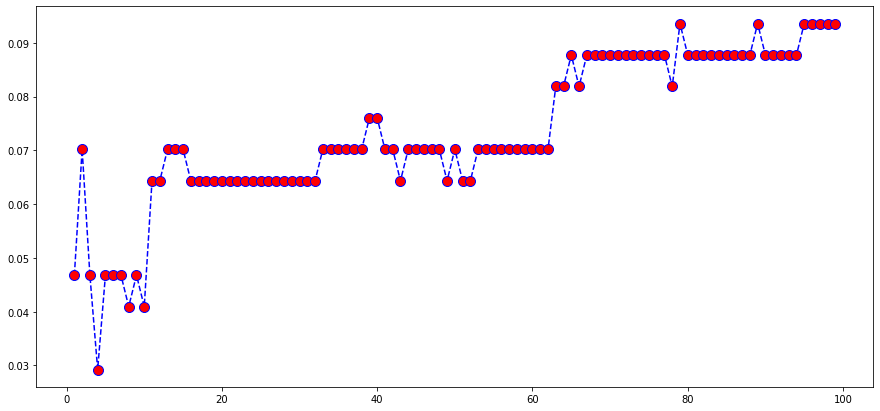

In [144]:
plt.figure(figsize=(15,7))
plt.plot(range(1,100), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.xlabel = 'Number of K'
plt.ylabel = 'Error Rate'

In [145]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [146]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

In [147]:
pred3 = knn.predict(scaler.transform(xtest))

In [148]:
confusion_matrix(pred3, ytest)

array([[ 63,   2],
       [  3, 103]])

In [149]:
print(classification_report(pred3, ytest))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.98      0.97      0.98       106

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Latihan 2

In [160]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [378]:
heart = pd.read_csv('heart.csv')

In [379]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [380]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [381]:
x = heart.drop('target', axis = 1)
y = heart['target']

In [382]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [383]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 101)

### Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(dual=False, max_iter=1000)
logmodel.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [157]:
pred_log = logmodel.predict(xtest)

In [158]:
confusion_matrix(ytest, pred_log)

array([[34, 10],
       [ 3, 44]])

In [161]:
accuracy_score(ytest, pred_log)

0.8571428571428571

### Logit

In [213]:
import statsmodels.api as sm
logit = sm.Logit(ytrain, sm.add_constant(xtrain))

In [214]:
hasil = logit.fit()

Optimization terminated successfully.
         Current function value: 0.360485
         Iterations 7


In [215]:
hasil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           13
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:                  0.4751
Time:                        21:06:19   Log-Likelihood:                -76.423
converged:                       True   LL-Null:                       -145.59
Covariance Type:            nonrobust   LLR p-value:                 4.554e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8631      3.022      1.940      0.052      -0.060      11.786
age           -0.0229      0.027     -0.846      0.398      -0.076       0.030
sex           -1.7053      0.538     -3.169      0.002      -2.760      -0.651
cp             0.8956      0.218      4.114      0.000       0.469       1.322
trestbps      -0.0200      0.012     -1.624      0.104      -0.044       0.004
chol          -0.0051      0.005     -0.988      0.323      -0.015       0.005
fbs            0.6807      0.621      1.096      0.273      -0.537       1.898
restecg        0.4200      0.403      1.041      0.298      -0.371       1.211
thalach        0.0128      0.012      1.048      0.294      -0.011       0.037
exang         -1.0014      0.487     -2.058      0.040      -1.955      -0.048
oldpeak       -0.5195      0.264     -1.965      0.049      -1.038      -0.001
slope          0.6438      0.473      1.361      0.174      -0.283       1.571
ca            -0.7302      0.220     -3.318      0.001      -1.162      -0.299
thal          -0.8671      0.346     -2.505      0.012      -1.545      -0.189
==============================================================================
"""

In [216]:
logit_fix = sm.Logit(ytrain, sm.add_constant(xtrain[['sex','cp','exang','oldpeak','ca','thal']]))
hasil_fix = logit_fix.fit()
hasil_fix.summary()

Optimization terminated successfully.
         Current function value: 0.392774
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                            6
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:                  0.4280
Time:                        21:07:27   Log-Likelihood:                -83.268
converged:                       True   LL-Null:                       -145.59
Covariance Type:            nonrobust   LLR p-value:                 1.729e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8420      0.838      4.586      0.000       2.200       5.484
sex           -1.1230      0.456     -2.460      0.014      -2.018      -0.228
cp             0.9491      0.205      4.621      0.000       0.547       1.352
exang         -1.1267      0.438     -2.575      0.010      -1.984      -0.269
oldpeak       -0.8272      0.206     -4.022      0.000      -1.230      -0.424
ca            -0.6925      0.196     -3.538      0.000      -1.076      -0.309
thal          -0.9126      0.321     -2.843      0.004      -1.542      -0.283
==============================================================================
"""

In [217]:
logmodel_fix = LogisticRegression()
logmodel_fix.fit(xtrain[['sex','cp','exang','oldpeak','ca','thal']], ytrain)

LogisticRegression()

In [218]:
pred_logit = logmodel_fix.predict(xtest[['sex','cp','exang','oldpeak','ca','thal']])

In [219]:
confusion_matrix(ytest, pred_logit)

array([[34, 10],
       [ 6, 41]])

In [220]:
accuracy_score(ytest, pred_logit)

0.8241758241758241

### Decision Tree

In [171]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [172]:
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [173]:
pred_dt = dtree.predict(xtest)

In [174]:
confusion_matrix(ytest, pred_dt)

array([[30, 14],
       [ 3, 44]])

In [175]:
accuracy_score(ytest, pred_dt)

0.8131868131868132

### Decision Tree AdaBoost

In [182]:
from sklearn.ensemble import AdaBoostClassifier

In [183]:
ad_dt = AdaBoostClassifier(base_estimator = dtree, algorithm = 'SAMME')

In [184]:
ad_dt.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier())

In [185]:
pred_ad_dt = ad_dt.predict(xtest)

In [186]:
confusion_matrix(ytest, pred_ad_dt)

array([[30, 14],
       [ 2, 45]])

In [187]:
accuracy_score(ytest, pred_ad_dt)

0.8241758241758241

### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [189]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [190]:
pred_rfc = rfc.predict(xtest)

In [191]:
confusion_matrix(ytest, pred_rfc)

array([[34, 10],
       [ 5, 42]])

In [192]:
accuracy_score(ytest, pred_rfc)

0.8351648351648352

### Random Forest AdaBoost

In [208]:
ad_rfc = AdaBoostClassifier(base_estimator = rfc, algorithm = 'SAMME')

In [209]:
ad_rfc.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME', base_estimator=RandomForestClassifier())

In [210]:
pred_ad_rfc = ad_rfc.predict(xtest)

In [211]:
confusion_matrix(ytest, pred_ad_rfc)

array([[36,  8],
       [ 6, 41]])

In [212]:
accuracy_score(ytest, pred_ad_rfc)

0.8461538461538461

### Random Forest Tuning

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
param = {
    'base_estimator__min_samples_split' : [5,10,20],
    'n_estimators' : [10,20,40]
}

search = GridSearchCV(estimator = ad_rfc, param_grid = param, scoring = 'roc_auc', cv = 5, n_jobs = -1)

In [235]:
search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__min_samples_split': [5, 10, 20],
                         'n_estimators': [10, 20, 40]},
             scoring='roc_auc')

In [236]:
search.best_params_

{'base_estimator__min_samples_split': 20, 'n_estimators': 10}

In [248]:
rfc = RandomForestClassifier(min_samples_split = 20)
ad_rfc = AdaBoostClassifier(base_estimator = rfc, n_estimators = 10, algorithm = 'SAMME')

In [249]:
ad_rfc.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(min_samples_split=20),
                   n_estimators=10)

In [250]:
pred_ad_rfct = ad_rfc.predict(xtest)

In [251]:
confusion_matrix(ytest, pred_ad_rfct)

array([[34, 10],
       [ 5, 42]])

In [252]:
accuracy_score(ytest, pred_ad_rfct)

0.8351648351648352

### Gradient Boosting

In [221]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier()

In [222]:
gboost.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [223]:
pred_gb = gboost.predict(xtest)

In [224]:
confusion_matrix(ytest, pred_gb)

array([[34, 10],
       [ 6, 41]])

In [225]:
accuracy_score(ytest, pred_gb)

0.8241758241758241

### XGBoost

In [226]:
from xgboost import XGBClassifier

In [227]:
xbst = XGBClassifier(learning_rate = 0.01, n_estimators = 100)

In [228]:
xbst.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [229]:
pred_xbst = xbst.predict(xtest)

In [230]:
confusion_matrix(ytest, pred_xbst)

array([[32, 12],
       [ 4, 43]])

In [231]:
accuracy_score(ytest, pred_xbst)

0.8241758241758241

### TPOT

In [259]:
from tpot import TPOTClassifier

In [260]:
tpot = TPOTClassifier(subsample = 0.7, verbosity = 2, warm_start = True, max_time_mins = 2)

In [261]:
tpot.fit(xtrain, ytrain)


Generation 1 - Current best internal CV score: 0.8239080459770115
Generation 2 - Current best internal CV score: 0.8308045977011493
2.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: BernoulliNB(StandardScaler(Normalizer(input_matrix, norm=max)), alpha=0.01, fit_prior=True)


TPOTClassifier(log_file=<ipykernel.iostream.OutStream object at 0x10b0e06d0>,
               max_time_mins=2, subsample=0.7, verbosity=2, warm_start=True)

In [262]:
pred_tpot = tpot.predict(xtest)

In [263]:
confusion_matrix(ytest, pred_tpot)

array([[36,  8],
       [ 4, 43]])

In [264]:
accuracy_score(ytest, pred_tpot)

0.8681318681318682

### KNN

In [384]:
scaler = StandardScaler()

In [385]:
scaler.fit(xtrain)

StandardScaler()

In [386]:
xtrain = pd.DataFrame(scaler.transform(xtrain), columns = xtrain.columns)

In [387]:
error_rate = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(scaler.transform(xtest))
    error_rate.append(np.mean(pred_i != ytest))

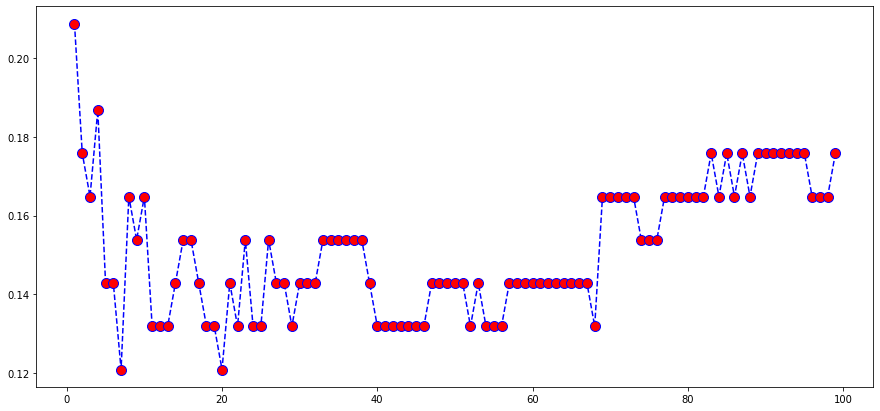

In [388]:
plt.figure(figsize=(15,7))
plt.plot(range(1,100), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.xlabel = 'Number of K'
plt.ylabel = 'Error Rate'

In [389]:
knn = KNeighborsClassifier(n_neighbors = 7)

In [390]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [391]:
pred_knn = knn.predict(scaler.transform(xtest))

In [392]:
confusion_matrix(pred_knn, ytest)

array([[37,  4],
       [ 7, 43]])

In [393]:
accuracy_score(pred_knn, ytest)

0.8791208791208791

### Rangkuman

In [326]:
aclog = accuracy_score(ytest, pred_log)
aclogit = accuracy_score(ytest, pred_logit)
acdt = accuracy_score(ytest, pred_dt)
acaddt = accuracy_score(ytest, pred_ad_dt)
acrfc = accuracy_score(ytest, pred_rfc)
acadrfc = accuracy_score(ytest, pred_ad_rfc)
acrfct = accuracy_score(ytest, pred_ad_rfct)
acgb = accuracy_score(ytest, pred_gb)
acxbst = accuracy_score(ytest, pred_xbst)
actpot = accuracy_score(ytest, pred_tpot)
acknn = accuracy_score(pred_knn, ytest)

In [346]:
rangkuman = pd.DataFrame([[aclog, aclogit, acdt, acaddt, acrfc, acadrfc, acrfct, acgb, acxbst, actpot, acknn]], columns = ['Logistic Regression', 'Logit', 'Decision Tree', 'Decision Tree AdaBoost', 'Random Forest', 'Random Forest AdaBoost', ' Random Forest Tuning', 'Gradient Boosting', 'XGBoost' , 'TPOT', 'KNN']).transpose()

In [347]:
rangkuman

,0
Logistic Regression,0.857143
Logit,0.824176
Decision Tree,0.813187
Decision Tree AdaBoost,0.824176
Random Forest,0.835165
Random Forest AdaBoost,0.846154
Random Forest Tuning,0.835165
Gradient Boosting,0.824176
XGBoost,0.824176
TPOT,0.868132
